<a id='top'></a>
### Table of contents

1. Importing Visualization Libraries and Data

2. [Merging the data](#merge)

- [Merging food prices, population, and number of undernourished people data](#food_undernourished)
- [Merging food prices and average earning data](#earnings)
- [Merging food prices and inflation data](#inflation)
- [Merging food prices and gdp per capita data](#gdp)


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter
from fuzzywuzzy import process, fuzz
from datetime import date
from datetime import datetime

In [2]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

In [49]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data\Data Prepared' #creating a path
path1=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path

<a id='merge'></a>
# Merging the data

[Back to top](#top)

<a id='merge'></a>
### Merging food prices, population, and number of undernourished people data

[Back to top](#top)

In [4]:
# Importing population and nr. of undernourished people

df_under= pd.read_pickle(os.path.join(path,'population_undernourished.pkl'))

In [5]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 4451
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  4452 non-null   object 
 1   iso                      4452 non-null   object 
 2   year                     4452 non-null   int32  
 3   population               4452 non-null   float64
 4   millions_undernourished  2530 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 191.3+ KB


In [6]:
df_under.head() 

,country,iso,year,population,millions_undernourished
0,Afghanistan,AFG,2001,19688632.0,9.3
1,Afghanistan,AFG,2002,21000256.0,9.3
2,Afghanistan,AFG,2003,22645130.0,8.7
3,Afghanistan,AFG,2004,23553551.0,8.6
4,Afghanistan,AFG,2005,24411191.0,8.5


In [7]:
df_under.describe() #basic statistics

,year,population,millions_undernourished
count,4452.000000,4.452000e+03,2530.000000
mean,2011.000000,3.313633e+07,5.050514
std,6.055981,1.307865e+08,19.308644
min,2001.000000,9.609000e+03,0.100000
25%,2006.000000,7.507765e+05,0.200000
50%,2011.000000,5.931242e+06,1.300000
75%,2016.000000,2.147950e+07,3.800000
max,2021.000000,1.412360e+09,249.600000


In [8]:
df_under['country'].nunique() #Number of countries

212

In [9]:
df_under['year'].nunique() #Number of years

21

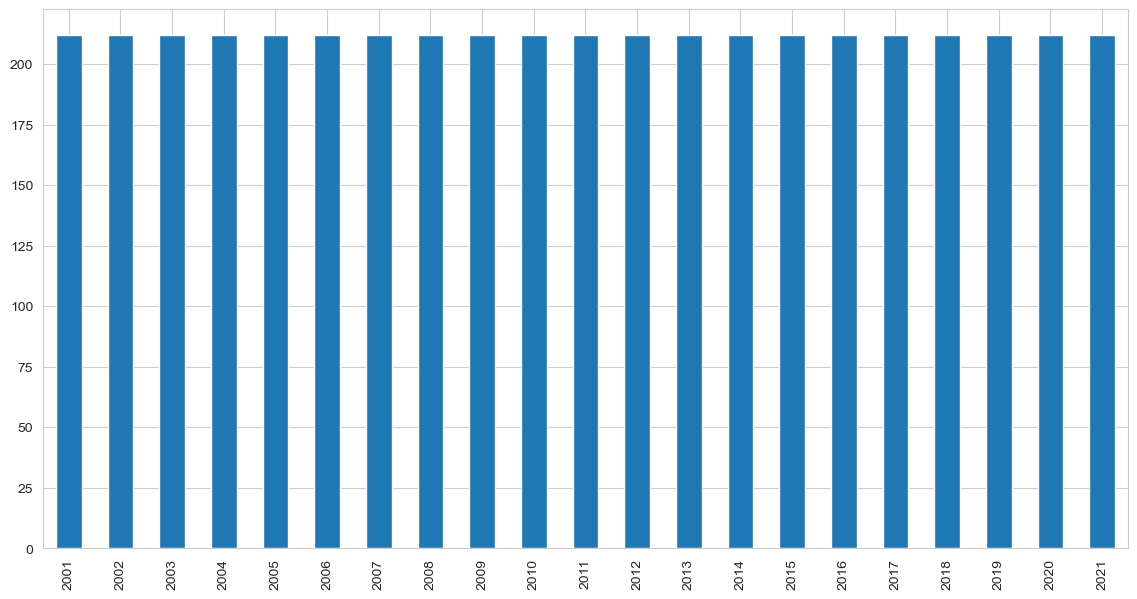

In [10]:
# Checking year dictribution

year_dist=df_under['year'].value_counts().sort_index().plot(kind='bar')

In [11]:
#Final check of country names

set_missmatched=set(df_under['country'].unique())
set_missmatched

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 

<a id='food_undernourished'></a>
## Merging food prices, population, and number of undernourished people data

[Back to top](#top)

In [12]:
#Importing data

df_food=pd.read_pickle(os.path.join(path, 'market_level_data_clean_aggregated.pkl'))

In [13]:
df_food.head()

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date
0,AFG,Afghanistan,Badakhshan,37.03785,70.45621,2020-05,Retail,cereals and tubers,AFN,KG,Bread,50.00,0.65360,2020-05-01
1,AFG,Afghanistan,Badakhshan,37.03785,70.45621,2020-05,Retail,cereals and tubers,AFN,KG,Rice,82.75,1.08165,2020-05-01
2,AFG,Afghanistan,Badakhshan,37.03785,70.45621,2020-05,Retail,cereals and tubers,AFN,KG,Wheat,31.00,0.40520,2020-05-01
3,AFG,Afghanistan,Badakhshan,37.03785,70.45621,2020-05,Retail,cereals and tubers,AFN,KG,Wheat flour,39.50,0.51635,2020-05-01
4,AFG,Afghanistan,Badakhshan,37.03785,70.45621,2020-05,Retail,miscellaneous food,AFN,KG,Salt,25.00,0.32680,2020-05-01


In [14]:
df_food['iso'].unique()

array(['AFG', 'AGO', 'ARG', 'ARM', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD',
       'BLR', 'BOL', 'BTN', 'CAF', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'CPV', 'CRI', 'DJI', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI',
       'ETH', 'FJI', 'GAB', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GTM',
       'HND', 'HTI', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO',
       'MDA', 'MDG', 'MEX', 'MLI', 'MMR', 'MNG', 'MOZ', 'MRT', 'MWI',
       'NAM', 'NER', 'NGA', 'NIC', 'NPL', 'PAK', 'PAN', 'PER', 'PHL',
       'PRY', 'PSE', 'RUS', 'RWA', 'SDN', 'SEN', 'SLE', 'SLV', 'SOM',
       'SSD', 'SWZ', 'SYR', 'TCD', 'TGO', 'THA', 'TJK', 'TLS', 'TUR',
       'TZA', 'UGA', 'UKR', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype=object)

In [15]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164814 entries, 0 to 2164813
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   iso            object        
 1   country        object        
 2   market         object        
 3   latitude       float64       
 4   longitude      float64       
 5   year_month     object        
 6   pricetype      object        
 7   category       object        
 8   currency       object        
 9   measure_unit   object        
 10  product_name   object        
 11  price_unit     float64       
 12  usdprice_unit  float64       
 13  date           datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 231.2+ MB


In [16]:
df_food['year']=df_food['date'].dt.strftime('%Y')

df_food['year']=df_food['year'].astype('int')
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164814 entries, 0 to 2164813
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   iso            object        
 1   country        object        
 2   market         object        
 3   latitude       float64       
 4   longitude      float64       
 5   year_month     object        
 6   pricetype      object        
 7   category       object        
 8   currency       object        
 9   measure_unit   object        
 10  product_name   object        
 11  price_unit     float64       
 12  usdprice_unit  float64       
 13  date           datetime64[ns]
 14  year           int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(9)
memory usage: 239.5+ MB


In [17]:
# Merging the data

df_food_un=pd.merge(df_food, df_under[['iso','year','population','millions_undernourished']], how='left', on=['iso', 'year'], sort=True, indicator=True)

In [18]:
df_food_un.head()

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date,year,population,millions_undernourished,_merge
0,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-03,Retail,non-food,AFN,L,Diesel,50000.0,1055.0656,2000-03-01,2000,NaN,NaN,left_only
1,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-04,Retail,non-food,AFN,L,Diesel,49000.0,1036.6597,2000-04-01,2000,NaN,NaN,left_only
2,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,"meat, fish and eggs",AFN,Unit,Livestock,1625000.0,34379.0197,2000-05-01,2000,NaN,NaN,left_only
3,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,non-food,AFN,L,Diesel,44625.0,944.1008,2000-05-01,2000,NaN,NaN,left_only
4,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-06,Retail,"meat, fish and eggs",AFN,Unit,Livestock,1476000.0,31226.7280,2000-06-01,2000,NaN,NaN,left_only


In [19]:
df_food_un.shape

(2164814, 18)

In [20]:
df_food_un['_merge'].value_counts()

both          1655029
left_only      509785
right_only          0
Name: _merge, dtype: int64

In [21]:
df_food_un.isnull().sum()

iso                             0
country                         0
market                          0
latitude                        0
longitude                       0
year_month                      0
pricetype                       0
category                        0
currency                        0
measure_unit                    0
product_name                    0
price_unit                      0
usdprice_unit                   0
date                            0
year                            0
population                 509785
millions_undernourished    696448
_merge                          0
dtype: int64

In [22]:
# Dropping the 'merge' 

df_food_un.drop(columns=['_merge'], inplace=True)

<a id='earnings'></a>
## Merging food prices and average earning data

[Back to top](#top)

In [23]:
#Importing data
df_earnings=pd.read_pickle(os.path.join(path,'average_earning_prepared.pkl'))

In [24]:
df_earnings.tail(10)

,country,year,avg_earning_LC
3074,Zimbabwe,1979,175.00
3075,Zimbabwe,1978,156.67
3076,Zimbabwe,1977,149.17
3077,Zimbabwe,1976,129.17
3078,Zimbabwe,1975,115.83
3079,Zimbabwe,1974,94.17
3080,Zimbabwe,1973,92.50
3081,Zimbabwe,1972,86.67
3082,Zimbabwe,1971,81.67
3083,Zimbabwe,1970,75.83


In [25]:
# Comparing country names in average earning and food data sets

country_earn=set(df_earnings['country'].to_list())
country_food=set(df_food_un['country'].to_list())

In [27]:

# Finding all missmatched values and creating a series with them

country_missing=np.sort(np.array(list(country_earn.union(country_food)-set(country_earn).intersection(country_food))))
country_missing

array(['Albania', 'Algeria', 'Andorra', 'Aruba', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chile', 'China',
       'China, Taiwan Province of', 'Comoros', 'Congo',
       'Congo, Dem. Rep.', 'Congo, Democratic Republic of the',
       'Congo, Rep.', 'Cook Islands', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark',
       'Egypt', 'Egypt, Arab Rep.', 'Eritrea', 'Estonia',
       'Falkland Islands (Malvinas)', 'Finland', 'France', 'Gabon',
       'Gambia', 'Gambia, The', 'Germany', 'Gibraltar', 'Greece', 'Guam',
       'Guernsey', 'Guinea', 'Guyana', 'Haiti', 'Hong Kong, China',
       'Hungary', 'Iceland', 'Iran, Islamic Rep.',
       'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Jersey', 'Kiribati'

In [30]:
# Using a data set with matched country names that I created before, I can try to unify names in both data sets

final_country_names=pd.read_pickle(os.path.join(path, 'country_names_matched.pkl'))

df_earn_new=df_earnings.merge(final_country_names[['country_name',
                                               'matched_country']], how='left', left_on='country', right_on='country_name')

df_earn_new[df_earn_new['country'].str.contains('Lao')]

,country,year,avg_earning_LC,country_name,matched_country
1697,Lao People's Democratic Republic,2017,1977052.52,Lao People's Democratic Republic,Lao PDR
1698,Lao People's Democratic Republic,2010,1111897.62,Lao People's Democratic Republic,Lao PDR


In [31]:
df_earn_new['matched_country'].unique()

array([nan, 'Bolivia (Plurinational State of)',
       'China, Taiwan Province of', "Cote d'Ivoire", 'Congo, Rep.',
       'Curacao', 'Egypt, Arab Rep.',
       'United Kingdom of Great Britain and Northern Ireland',
       'Gambia, The', 'Kyrgyz Republic', 'Lao PDR',
       'Netherlands (Kingdom of the)', 'Slovak Republic', 'Turkiye',
       'United States of America', 'Vietnam', 'Yemen, Rep.'], dtype=object)

In [32]:
# Replacing country names with matched names if these names are in food price data


df_earn_new.loc[(df_earn_new['matched_country'].notnull())&
                (df_earn_new['matched_country'].isin(list(country_food))),'country']=df_earn_new['matched_country']


In [33]:
df_earn_new['country'].unique() # checking if countries were replaced with matched names

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Netherlands Antilles', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile',
       'China, Taiwan Province of', "Cote d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo, Rep.', 'Cook Islands',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands (Malvinas)', 'France', 'United Kingdom',
       'Georgia', 'Guernsey', 'Ghana', 'Gibraltar', 'Gambia, The',
   

In [35]:
# Check what countries are still missmatched

country_earn_new=set(df_earn_new['country'].unique())
country_still_missing=np.sort(np.array(list(country_earn_new.union(country_food)-set(country_earn_new).intersection(country_food))))
country_still_missing

array(['Albania', 'Algeria', 'Andorra', 'Aruba', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chile', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Democratic Republic of the', 'Cook Islands', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Eritrea',
       'Estonia', 'Falkland Islands (Malvinas)', 'Finland', 'France',
       'Gabon', 'Germany', 'Gibraltar', 'Greece', 'Guam', 'Guernsey',
       'Guinea', 'Guyana', 'Haiti', 'Hong Kong, China', 'Hungary',
       'Iceland', 'Iran, Islamic Rep.', 'Iran, Islamic Republic of',
       'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
       'Jersey', 'Kiribati', 'Korea, Republic of', 'Kosovo', 'Kuwait',
       'Latvia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macau, China', 'Malaysia', 'Maldives', 'Malta',
 

In [36]:
len(country_still_missing)

118

In [37]:
# There are 4 countries that weren't matched using the previously matched names because they are different from both versions

df_earn_new.loc[df_earn_new['country']=='Congo, Democratic Republic of the', 'country']='Congo, Dem. Rep.'
df_earn_new.loc[df_earn_new['country']=='Iran, Islamic Republic of', 'country']='Iran, Islamic Rep.'
df_earn_new.loc[df_earn_new['country']=='Moldova, Republic of', 'country']='Moldova'
df_earn_new.loc[df_earn_new['country']=='Tanzania, United Republic of', 'country']='Tanzania'

In [38]:
df_earn_new.shape

(3084, 5)

In [39]:
# Merging food prices and earnings data

df_food_un_earn=pd.merge(df_food_un, df_earn_new[['country','year','avg_earning_LC']], on=['country','year'], how='left', sort=True, indicator=True)

In [40]:
df_food_un_earn.tail()

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date,year,population,millions_undernourished,avg_earning_LC,_merge
2164809,ZWE,Zimbabwe,Nkayi Growth Point,-18.999158,28.898316,2023-01,Retail,non-food,USD,KG,Handwash soap,1.5336,1.5336,2023-01-01,2023,NaN,NaN,NaN,left_only
2164810,ZWE,Zimbabwe,Nkayi Growth Point,-18.999158,28.898316,2023-01,Retail,non-food,USD,KG,Laundry soap,1.9280,1.9280,2023-01-01,2023,NaN,NaN,NaN,left_only
2164811,ZWE,Zimbabwe,Nkayi Growth Point,-18.999158,28.898316,2023-01,Retail,non-food,USD,L,Toothpaste,19.1700,19.1700,2023-01-01,2023,NaN,NaN,NaN,left_only
2164812,ZWE,Zimbabwe,Nkayi Growth Point,-18.999158,28.898316,2023-01,Retail,oil and fats,USD,L,Oil,2.7386,2.7386,2023-01-01,2023,NaN,NaN,NaN,left_only
2164813,ZWE,Zimbabwe,Nkayi Growth Point,-18.999158,28.898316,2023-01,Retail,pulses and nuts,USD,KG,Beans,2.1909,2.1909,2023-01-01,2023,NaN,NaN,NaN,left_only


In [41]:
df_food_un_earn['_merge'].value_counts() #In many countries of interested earnings data are not being recorded regularly, so, only about 600k records were matched

left_only     1566426
both           598388
right_only          0
Name: _merge, dtype: int64

In [42]:
df_food_un_earn.shape

(2164814, 19)

In [43]:
# Dropping the 'merge' and column
df_food_un_earn.drop(columns=['_merge'], inplace=True)

In [44]:
# Checking how many countries have prices recorded in USD instead of local currency

df_food_un_earn[['country','currency']][df_food_un_earn['currency']=='USD'].value_counts()

country      currency
Zimbabwe     USD         21420
Malawi       USD         18277
Timor-Leste  USD          7296
El Salvador  USD          5967
Ecuador      USD          4188
Costa Rica   USD           330
dtype: int64

In [45]:
# How many of those have average earnings data

df_food_un_earn[['country',
                 'currency',
                 'year',
                 'avg_earning_LC']][(df_food_un_earn['currency']=='USD')&(df_food_un_earn['avg_earning_LC'].notna())].value_counts()

# In most countries, salaries are already recorded in USD. I need to recalculate Costa Rica, 2013 in Malawi. as well as 2022 and 2021 in Zimbabwe

country      currency  year  avg_earning_LC
Zimbabwe     USD       2021  13935.05          5737
                       2022  132948.34         2592
Malawi       USD       2013  21062.00          2295
Timor-Leste  USD       2021  257.59            1965
Ecuador      USD       2022  501.02             868
                       2021  483.61             853
                       2020  472.59             722
Timor-Leste  USD       2013  412.77             558
El Salvador  USD       2013  295.73             540
                       2010  272.15             540
                       2012  281.37             534
                       2011  272.85             534
                       2014  301.60             468
                       2005  246.70             452
                       2006  247.40             429
Zimbabwe     USD       2014  316.93             320
                       2015  763.58             261
                       2011  230.59             245
                    

In [46]:
df_food_un_earn[(df_food_un_earn['country']=='Timor-Leste')&
               (df_food_un_earn['avg_earning_LC'].notnull())&
               (df_food_un_earn['year']==2001)] 

#Timor-Leste already has all of the earning data in USD. Originally, only in 2001 the data was imputed in TPE

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date,year,population,millions_undernourished,avg_earning_LC


In [47]:
df_food_un_earn[(df_food_un_earn['country']=='Timor-Leste')&
               (df_food_un_earn['avg_earning_LC'].notnull())] 

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date,year,population,millions_undernourished,avg_earning_LC
1949549,TLS,Timor-Leste,Balibo,-8.968889,125.040556,2013-01,Retail,cereals and tubers,USD,KG,Maize,0.730,0.730,2013-01-01,2013,1161555.0,0.3,412.77
1949550,TLS,Timor-Leste,Balibo,-8.968889,125.040556,2013-01,Retail,cereals and tubers,USD,KG,Rice,0.815,0.815,2013-01-01,2013,1161555.0,0.3,412.77
1949551,TLS,Timor-Leste,Balibo,-8.968889,125.040556,2013-02,Retail,cereals and tubers,USD,KG,Maize,0.930,0.930,2013-02-01,2013,1161555.0,0.3,412.77
1949552,TLS,Timor-Leste,Balibo,-8.968889,125.040556,2013-02,Retail,cereals and tubers,USD,KG,Rice,0.815,0.815,2013-02-01,2013,1161555.0,0.3,412.77
1949553,TLS,Timor-Leste,Balibo,-8.968889,125.040556,2013-03,Retail,cereals and tubers,USD,KG,Maize,0.730,0.730,2013-03-01,2013,1161555.0,0.3,412.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953714,TLS,Timor-Leste,Viqueque,-8.867510,126.365740,2021-12,Retail,oil and fats,USD,L,Oil,1.480,1.480,2021-12-01,2021,1320942.0,0.3,257.59
1953715,TLS,Timor-Leste,Viqueque,-8.867510,126.365740,2021-12,Retail,pulses and nuts,USD,KG,Beans,3.400,3.400,2021-12-01,2021,1320942.0,0.3,257.59
1953716,TLS,Timor-Leste,Viqueque,-8.867510,126.365740,2021-12,Retail,vegetables and fruits,USD,KG,Chili,6.560,6.560,2021-12-01,2021,1320942.0,0.3,257.59
1953717,TLS,Timor-Leste,Viqueque,-8.867510,126.365740,2021-12,Retail,vegetables and fruits,USD,KG,Onions,6.060,6.060,2021-12-01,2021,1320942.0,0.3,257.59


In [50]:
#Now I use exchange rates data from https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange


df_exchange=pd.read_csv(os.path.join(path1,'exchange_rate.csv'), index_col=False)

In [51]:
df_exchange.head()

,Record Date,Country,Currency,Country - Currency Description,Exchange Rate,Effective Date,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-06-30,Chile,Peso,Chile-Peso,887.600,2023-09-15,36,2023,3,2023,2,6,30
1,2023-06-30,Argentina,Peso,Argentina-Peso,365.500,2023-08-15,7,2023,3,2023,2,6,30
2,2023-06-30,Belarus,New Ruble,Belarus-New Ruble,3.265,2023-08-15,16,2023,3,2023,2,6,30
3,2023-06-30,Myanmar,Kyat,Myanmar-Kyat,2918.000,2023-08-15,108,2023,3,2023,2,6,30
4,2023-06-30,Russia,Ruble,Russia-Ruble,98.855,2023-08-15,130,2023,3,2023,2,6,30


In [52]:
df_ex=df_exchange[['Country','Exchange Rate','Effective Date', 'Calendar Year']] 

country_list=['Costa Rica','Malawi','Zimbabwe'] # list of countries I need

df=df_ex[df_ex['Country'].isin(country_list)] # isolating the data 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 10 to 16846
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         228 non-null    object 
 1   Exchange Rate   228 non-null    float64
 2   Effective Date  228 non-null    object 
 3   Calendar Year   228 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.9+ KB


In [54]:
df.head(20) #in some countries exchange rate can vary a lot month by month

,Country,Exchange Rate,Effective Date,Calendar Year
10,Zimbabwe,4800.960,2023-07-14,2023
48,Costa Rica,541.900,2023-06-30,2023
100,Malawi,1053.430,2023-06-30,2023
179,Zimbabwe,6141.840,2023-06-30,2023
196,Zimbabwe,968.042,2023-04-14,2023
235,Costa Rica,539.650,2023-03-31,2023
286,Malawi,1035.490,2023-03-31,2023
363,Zimbabwe,894.000,2023-03-31,2023
370,Zimbabwe,795.725,2023-01-31,2022
413,Costa Rica,591.360,2022-12-31,2022


In [55]:
df['Effective Date']=pd.to_datetime(df['Effective Date'])

C:\Users\frauz\AppData\Local\Temp\ipykernel_13884\3598934848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Effective Date']=pd.to_datetime(df['Effective Date'])


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 10 to 16846
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country         228 non-null    object        
 1   Exchange Rate   228 non-null    float64       
 2   Effective Date  228 non-null    datetime64[ns]
 3   Calendar Year   228 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [58]:
df['year_month']=df['Effective Date'].dt.strftime('%Y_%m')

C:\Users\frauz\AppData\Local\Temp\ipykernel_13884\490286239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month']=df['Effective Date'].dt.strftime('%Y_%m')


In [59]:
df.head(20)

,Country,Exchange Rate,Effective Date,Calendar Year,month,year_month
10,Zimbabwe,4800.960,2023-07-14,2023,07,2023_07
48,Costa Rica,541.900,2023-06-30,2023,06,2023_06
100,Malawi,1053.430,2023-06-30,2023,06,2023_06
179,Zimbabwe,6141.840,2023-06-30,2023,06,2023_06
196,Zimbabwe,968.042,2023-04-14,2023,04,2023_04
235,Costa Rica,539.650,2023-03-31,2023,03,2023_03
286,Malawi,1035.490,2023-03-31,2023,03,2023_03
363,Zimbabwe,894.000,2023-03-31,2023,03,2023_03
370,Zimbabwe,795.725,2023-01-31,2022,01,2023_01
413,Costa Rica,591.360,2022-12-31,2022,12,2022_12


In [60]:
df_exchange=df[['Country','Exchange Rate','Calendar Year','year_month']].drop_duplicates()

In [61]:
df_exchange

,Country,Exchange Rate,Calendar Year,year_month
10,Zimbabwe,4800.960,2023,2023_07
48,Costa Rica,541.900,2023,2023_06
100,Malawi,1053.430,2023,2023_06
179,Zimbabwe,6141.840,2023,2023_06
196,Zimbabwe,968.042,2023,2023_04
...,...,...,...,...
16583,Malawi,75.250,2001,2001_06
16664,Zimbabwe,118.000,2001,2001_06
16706,Costa Rica,321.010,2001,2001_03
16766,Malawi,79.750,2001,2001_03


In [63]:
# I want to make sure that the exchange rate is as accurate as possible. For that I will first import the data on monthly level

df_exchange_merge=pd.merge(df_food_un_earn, df_exchange, how='left', left_on=['country','year_month'], right_on=['Country','year_month'])

In [64]:
df_exchange_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164814 entries, 0 to 2164813
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   iso                      object        
 1   country                  object        
 2   market                   object        
 3   latitude                 float64       
 4   longitude                float64       
 5   year_month               object        
 6   pricetype                object        
 7   category                 object        
 8   currency                 object        
 9   measure_unit             object        
 10  product_name             object        
 11  price_unit               float64       
 12  usdprice_unit            float64       
 13  date                     datetime64[ns]
 14  year                     int32         
 15  population               float64       
 16  millions_undernourished  float64       
 17  avg_earning_LC           fl

In [65]:
# Now I calculate the average yearly exchange rate that I can add where months are not specified

df_year_ex=df.groupby(['Country','Calendar Year']).agg({'Exchange Rate':'mean'})

In [66]:
df_year_ex.reset_index(inplace=True)

df_year_ex

,Country,Calendar Year,Exchange Rate
0,Costa Rica,2001,3.300350e+02
1,Costa Rica,2002,3.617900e+02
2,Costa Rica,2003,4.014400e+02
3,Costa Rica,2004,4.401100e+02
4,Costa Rica,2005,4.797125e+02
5,Costa Rica,2006,5.115100e+02
6,Costa Rica,2007,5.120500e+02
7,Costa Rica,2008,5.301950e+02
8,Costa Rica,2009,5.671500e+02
9,Costa Rica,2010,5.102900e+02


In [67]:
# Now I can export yearly average exchange rate

df_exchange_merge=pd.merge(df_exchange_merge, df_year_ex[['Country',
                                       'Calendar Year',
                                       'Exchange Rate']], how='left', left_on=['country',
                                                                               'year',], right_on=['Country',
                                                                                                   'Calendar Year',])

In [68]:
df_exchange_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164814 entries, 0 to 2164813
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   iso                      object        
 1   country                  object        
 2   market                   object        
 3   latitude                 float64       
 4   longitude                float64       
 5   year_month               object        
 6   pricetype                object        
 7   category                 object        
 8   currency                 object        
 9   measure_unit             object        
 10  product_name             object        
 11  price_unit               float64       
 12  usdprice_unit            float64       
 13  date                     datetime64[ns]
 14  year                     int32         
 15  population               float64       
 16  millions_undernourished  float64       
 17  avg_earning_LC           fl

In [69]:
df_exchange_merge.tail(50) # Extreme changes in currency exchange rate make is difficult to record the exact value

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,...,year,population,millions_undernourished,avg_earning_LC,Country_x,Exchange Rate_x,Calendar Year_x,Country_y,Calendar Year_y,Exchange Rate_y
2164764,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-07,Retail,oil and fats,USD,L,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164765,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-07,Retail,pulses and nuts,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164766,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,cereals and tubers,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164767,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,cereals and tubers,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164768,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,"meat, fish and eggs",USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164769,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,miscellaneous food,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164770,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,miscellaneous food,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164771,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,non-food,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164772,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,non-food,USD,KG,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714
2164773,ZWE,Zimbabwe,Zvishavane Urban,-20.315901,30.054501,2022-11,Retail,non-food,USD,L,...,2022,NaN,NaN,132948.34,NaN,NaN,NaN,Zimbabwe,2022.0,436.944714


In [70]:
# Filling out missing monthly exchange rate using yearly data

df_exchange_merge.loc[df_exchange_merge['Exchange Rate_x'].isnull(), 'Exchange Rate_x']=df_exchange_merge['Exchange Rate_y']

In [71]:
# Calculating average earnings in USD using exchange rate and earnings in LC values

# Zimbabwe 2022, 2021

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='ZWE')&
                      (df_exchange_merge['year'].isin([2021,2022])),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [72]:
# Malawi

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='MWI')&
                      (df_exchange_merge['year']== 2013),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [73]:
# Costa Rica

df_exchange_merge.loc[(df_exchange_merge['avg_earning_LC'].notnull())&
                      (df_exchange_merge['Exchange Rate_x'].notnull())&
                      (df_exchange_merge['iso']=='CRI'),
                      'earnings_new']=df_exchange_merge['avg_earning_LC']/df_exchange_merge['Exchange Rate_x']

In [76]:
df_exchange_merge[['iso','year','earnings_new']].value_counts() # Calculated earnings don#t seem ot of place

iso  year  earnings_new
ZWE  2021  146.119485      5737
     2022  304.268105      2592
MWI  2013  52.786967       2295
CRI  2008  1087.711125       36
     2010  734.180838        36
     2011  780.745173        36
     2012  865.706700        36
     2013  950.772846        36
     2014  924.419613        30
     2007  460.133503        12
dtype: int64

In [77]:
# Replacing old earnings data with the new

df_exchange_merge.loc[df_exchange_merge['earnings_new'].notnull(),'avg_earning_LC']=df_exchange_merge['earnings_new']

In [78]:
df_exchange_merge[['country','avg_earning_LC']].value_counts()

country      avg_earning_LC
Indonesia    2690034.69        20302
             2511508.12        20209
             2561509.93        19408
India        17583.08          16449
Philippines  15528.29          15786
                               ...  
Malawi       131.18                3
             175.00                2
Azerbaijan   331.50                2
Malawi       109.71                2
             145.17                1
Length: 622, dtype: int64

In [79]:
# Removing columns we don't need anymore

df_exchange_merge.columns.to_list()

['iso',
 'country',
 'market',
 'latitude',
 'longitude',
 'year_month',
 'pricetype',
 'category',
 'currency',
 'measure_unit',
 'product_name',
 'price_unit',
 'usdprice_unit',
 'date',
 'year',
 'population',
 'millions_undernourished',
 'avg_earning_LC',
 'Country_x',
 'Exchange Rate_x',
 'Calendar Year_x',
 'Country_y',
 'Calendar Year_y',
 'Exchange Rate_y',
 'earnings_new']

In [80]:
list_remove=['Country_x','Calendar Year_x','Exchange Rate_x','Country_y','Calendar Year_y','Exchange Rate_y','earnings_new']

df_eanings_final=df_exchange_merge.drop(columns=list_remove)

In [81]:
df_eanings_final.rename(columns={'avg_earning_LC':'estim_earnings'}, inplace=True)

In [82]:
df_eanings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164814 entries, 0 to 2164813
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   iso                      object        
 1   country                  object        
 2   market                   object        
 3   latitude                 float64       
 4   longitude                float64       
 5   year_month               object        
 6   pricetype                object        
 7   category                 object        
 8   currency                 object        
 9   measure_unit             object        
 10  product_name             object        
 11  price_unit               float64       
 12  usdprice_unit            float64       
 13  date                     datetime64[ns]
 14  year                     int32         
 15  population               float64       
 16  millions_undernourished  float64       
 17  estim_earnings           fl

In [83]:
df_eanings_final.duplicated().value_counts() # No duplicates

False    2164814
dtype: int64

In [84]:
df_eanings_final.isnull().sum() #Unfortunatelly, average earning data is not available for most countries and years

iso                              0
country                          0
market                           0
latitude                         0
longitude                        0
year_month                       0
pricetype                        0
category                         0
currency                         0
measure_unit                     0
product_name                     0
price_unit                       0
usdprice_unit                    0
date                             0
year                             0
population                  509785
millions_undernourished     696448
estim_earnings             1566426
dtype: int64

<a id='inflation'></a>
## Merging food prices and inflation data
[Back to top](#top)

In [85]:
# Importing inflation data set

df_inflation=pd.read_pickle(os.path.join(path, 'inflation.pkl')) 

In [86]:
df_inflation.head()

,country,iso,year,inflation
7980,Aruba,ABW,1990,5.836688
7981,Africa Eastern and Southern,AFE,1990,12.457914
7982,Afghanistan,AFG,1990,NaN
7983,Africa Western and Central,AFW,1990,1.057361
7984,Angola,AGO,1990,NaN


In [87]:
#The data is already imported and can me merged

df_food_un_earn_infl=pd.merge(df_eanings_final, df_inflation[['iso','year','inflation']], on=['iso','year'], how='left', sort=True, indicator=True)

In [88]:
df_food_un_earn_infl.head()

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,product_name,price_unit,usdprice_unit,date,year,population,millions_undernourished,estim_earnings,inflation,_merge
0,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-03,Retail,non-food,AFN,L,Diesel,50000.0,1055.0656,2000-03-01,2000,NaN,NaN,NaN,NaN,both
1,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-04,Retail,non-food,AFN,L,Diesel,49000.0,1036.6597,2000-04-01,2000,NaN,NaN,NaN,NaN,both
2,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,"meat, fish and eggs",AFN,Unit,Livestock,1625000.0,34379.0197,2000-05-01,2000,NaN,NaN,NaN,NaN,both
3,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,non-food,AFN,L,Diesel,44625.0,944.1008,2000-05-01,2000,NaN,NaN,NaN,NaN,both
4,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-06,Retail,"meat, fish and eggs",AFN,Unit,Livestock,1476000.0,31226.7280,2000-06-01,2000,NaN,NaN,NaN,NaN,both


In [89]:
df_food_un_earn_infl['_merge'].value_counts() # the majority of records have been merged

both          2010475
left_only      154339
right_only          0
Name: _merge, dtype: int64

In [90]:
df_food_un_earn_infl.drop(columns=['_merge'], inplace=True)

In [91]:
df_food_un_earn_infl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164814 entries, 0 to 2164813
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   iso                      object        
 1   country                  object        
 2   market                   object        
 3   latitude                 float64       
 4   longitude                float64       
 5   year_month               object        
 6   pricetype                object        
 7   category                 object        
 8   currency                 object        
 9   measure_unit             object        
 10  product_name             object        
 11  price_unit               float64       
 12  usdprice_unit            float64       
 13  date                     datetime64[ns]
 14  year                     int32         
 15  population               float64       
 16  millions_undernourished  float64       
 17  estim_earnings           fl

In [92]:
df_food_un_earn_infl.isnull().sum()

iso                              0
country                          0
market                           0
latitude                         0
longitude                        0
year_month                       0
pricetype                        0
category                         0
currency                         0
measure_unit                     0
product_name                     0
price_unit                       0
usdprice_unit                    0
date                             0
year                             0
population                  509785
millions_undernourished     696448
estim_earnings             1566426
inflation                   491494
dtype: int64

<a id='gdp'></a>
## Merging food prices and gdp per capita data 

[Back to top](#top)

In [93]:
#Importing the data

df_gdp=pd.read_pickle(os.path.join(path, 'gdp_per_capita.pkl'))

In [94]:
df_gdp.head()

,country,iso,year,gdp_pcapita
7980,Aruba,ABW,1990,11638.733710
7981,Africa Eastern and Southern,AFE,1990,819.844296
7982,Afghanistan,AFG,1990,NaN
7983,Africa Western and Central,AFW,1990,591.989608
7984,Angola,AGO,1990,949.349841


In [95]:
#Merging the data

df_full=pd.merge(df_food_un_earn_infl, df_gdp[['iso','year','gdp_pcapita']], on=['iso','year'], how='left', sort=True, indicator=True)

In [96]:
df_full.head()

,iso,country,market,latitude,longitude,year_month,pricetype,category,currency,measure_unit,...,price_unit,usdprice_unit,date,year,population,millions_undernourished,estim_earnings,inflation,gdp_pcapita,_merge
0,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-03,Retail,non-food,AFN,L,...,50000.0,1055.0656,2000-03-01,2000,NaN,NaN,NaN,NaN,NaN,both
1,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-04,Retail,non-food,AFN,L,...,49000.0,1036.6597,2000-04-01,2000,NaN,NaN,NaN,NaN,NaN,both
2,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,"meat, fish and eggs",AFN,Unit,...,1625000.0,34379.0197,2000-05-01,2000,NaN,NaN,NaN,NaN,NaN,both
3,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-05,Retail,non-food,AFN,L,...,44625.0,944.1008,2000-05-01,2000,NaN,NaN,NaN,NaN,NaN,both
4,AFG,Afghanistan,Fayzabad,37.116638,70.580022,2000-06,Retail,"meat, fish and eggs",AFN,Unit,...,1476000.0,31226.7280,2000-06-01,2000,NaN,NaN,NaN,NaN,NaN,both


In [97]:
df_full['_merge'].value_counts() # the majority of records have been merged

both          2010475
left_only      154339
right_only          0
Name: _merge, dtype: int64

In [98]:
df_inflation[df_inflation['country']=='Afghanistan'] #checking if NaN values in the final dataframe make sense

,country,iso,year,inflation
7982,Afghanistan,AFG,1990,NaN
8248,Afghanistan,AFG,1991,NaN
8514,Afghanistan,AFG,1992,NaN
8780,Afghanistan,AFG,1993,NaN
9046,Afghanistan,AFG,1994,NaN
9312,Afghanistan,AFG,1995,NaN
9578,Afghanistan,AFG,1996,NaN
9844,Afghanistan,AFG,1997,NaN
10110,Afghanistan,AFG,1998,NaN
10376,Afghanistan,AFG,1999,NaN


In [99]:
df_gdp[df_gdp['country']=='Afghanistan'] #checking if NaN values make sense

,country,iso,year,gdp_pcapita
7982,Afghanistan,AFG,1990,NaN
8248,Afghanistan,AFG,1991,NaN
8514,Afghanistan,AFG,1992,NaN
8780,Afghanistan,AFG,1993,NaN
9046,Afghanistan,AFG,1994,NaN
9312,Afghanistan,AFG,1995,NaN
9578,Afghanistan,AFG,1996,NaN
9844,Afghanistan,AFG,1997,NaN
10110,Afghanistan,AFG,1998,NaN
10376,Afghanistan,AFG,1999,NaN


In [100]:
df_full.drop(columns='_merge', inplace=True)

In [101]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164814 entries, 0 to 2164813
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   iso                      object        
 1   country                  object        
 2   market                   object        
 3   latitude                 float64       
 4   longitude                float64       
 5   year_month               object        
 6   pricetype                object        
 7   category                 object        
 8   currency                 object        
 9   measure_unit             object        
 10  product_name             object        
 11  price_unit               float64       
 12  usdprice_unit            float64       
 13  date                     datetime64[ns]
 14  year                     int32         
 15  population               float64       
 16  millions_undernourished  float64       
 17  estim_earnings           fl

In [102]:
df_full.to_pickle(os.path.join(path, 'data_market_merged_no_var.pkl'))